Part 1:

Download the file data.txt from the Moodle web page (right click and “save link as” or similar). Use principal component analysis to map the data to 2 dimensions, visualize the data as scatter plot (you can re-use code for exercise 2). How many clusters can you identify from the data just by looking at the visualization?


In [2]:
# importing necessary modules
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np

# Loading data
X = np.loadtxt('data.txt', dtype=np.float, delimiter=',')

# Dimensionally reduction using PCA
scaler = preprocessing.StandardScaler().fit(X)
X_transformed = scaler.transform(X)
pca = PCA(n_components=2).fit(X)
X_pca= pca.transform(X)


In [3]:
# Checking for the change in shape

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

('original shape:   ', (500L, 10L))
('transformed shape:', (500L, 2L))


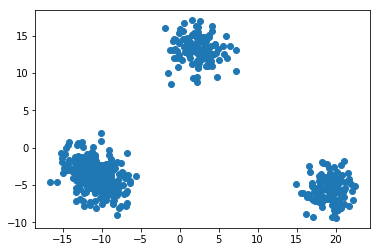

In [4]:
# importing necessary modules
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], cmap='viridis')

Part 2:

Run K-means clustering on the data for different values of K (use the original 10-dimensional data as input to K-means, not the PCA projection). Select the number K for which the clustering has the maximal Silhouette Score. Color the scatter plot of the PCA projection so that members of each cluster are colored differently.
Did you end up with the same clustering of the data as you did based on visual inspection of the PCA plot? If no, do you known which clustering captures the true structure of the data better?


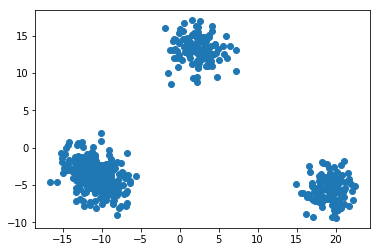

In [6]:
# importing necessary modules
from sklearn.cluster import KMeans
X = np.loadtxt('data.txt', dtype=np.float, delimiter=',')
pca = PCA(n_components=2).fit(X)
X_pca= pca.transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1])


In [7]:
# importing necessary modules
from sklearn.metrics import silhouette_samples, silhouette_score

best_k=0
best_s = 0
for i in range(2,11):
    
    kmean = KMeans(n_clusters=i)
    kmean.fit(X)
    y_kmean=kmean.predict(X)
    silhuoette=silhouette_score(X, y_kmean)
    if silhuoette>best_s:
        best_s=silhuoette
        best_k=i
print 'The best k is',best_k  
print 'The best best silhuoette is',best_s

kmean = KMeans(n_clusters=best_k)
kmean.fit(X)
y_kmean=kmean.predict(X)

The best k is 4
The best best silhuoette is 0.680814733075113


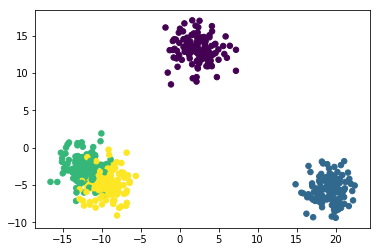

In [6]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmean, s=30, cmap='viridis')
centers=kmean.cluster_centers_


Part 3:

Load the Iris data set used in Exercise 2.  Visualize the data with scatter plot of 2-dimensional PCA projection, color each species separately (same picture as in Exercise 2). Remove the true species column, and pretend from now on that you do not know it.


In [7]:
# importing necessary modules
import pandas as pd

# Loading Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Dropping true species column
iris_removed_species=iris.drop(axis=1, columns=['class'])
iris_removed_species.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Part 1: 

Assume that you are told in advance, that there are three different species you should try to find from the data. Cluster the original 4-dimensional Iris data into 3 clusters with K-means method. Create another PCA scatter plot, where you visualize these three clusters. How well does the clustering found by K-means agree with the true class labels

In [9]:
# Loading iris data set
X = np.loadtxt('iris.data', dtype=np.float, usecols=[0,1,2,3], delimiter=',')
y = np.loadtxt('iris.data', dtype=np.str, usecols = 4, delimiter=',')

# PCA projection
#scaler = preprocessing.StandardScaler().fit(X)
#X_transformed = scaler.transform(X)
pca = PCA(n_components=2).fit(X)
X_pca= pca.transform(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

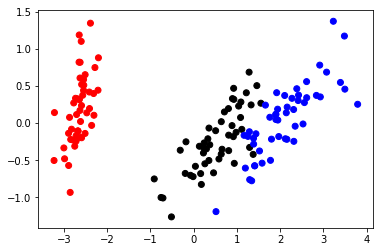

In [11]:
# Plotting
my_colormap = {"Iris-setosa":"red", "Iris-virginica":"blue", "Iris-versicolor":"black"}
colors = [my_colormap[a] for a in y]
plt.scatter(X_pca[:,0], X_pca[:,1], color=colors)

kmean = KMeans(n_clusters=3)
kmean.fit(X)



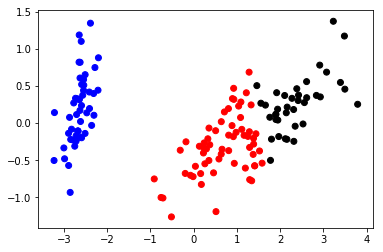

In [12]:
kmean.labels_
colormap= {1:'red', 2:'black', 0:'blue'}
colors=[colormap[a] for a in kmean.labels_]
plt.scatter(X_pca[:,0], X_pca[:,1], color=colors)

Part 2: 

Assume that you have no prior information about the number of clusters in the data. Select the number K for which the clustering of Iris has the maximal Silhouette Score. Visualize the K-means clustering for this value of K.  How well does the clustering found by K-means agree with the true class labels?

The best k was  2 0.6808136202713507


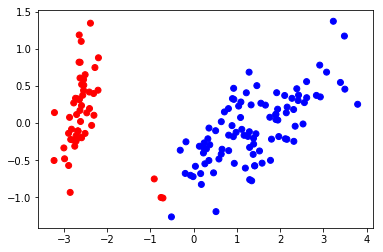

In [13]:
best_k=0
best_s = 0
for i in range(2,11):
    
    kmean = KMeans(n_clusters=i)
    kmean.fit(X)
    y_kmean=kmean.predict(X)
    silhuoette=silhouette_score(X, y_kmean)
    if silhuoette>best_s:
        best_s=silhuoette
        best_k=i
print 'The best k was ', best_k,  best_s

kmean = KMeans(n_clusters=best_k)
kmean.fit(X)

colormap= {1:'red', 2:'black', 0:'blue'}
colors=[colormap[a] for a in kmean.labels_]
plt.scatter(X_pca[:,0], X_pca[:,1], color=colors)

